In [1]:
import numpy as np

from euler import Euler

In [2]:
def sod(g, v, gamma, U):
    
    # setup initial conditions -- this is Sod's problem
    rho_l = 1.0
    u_l = 0.0
    p_l = 1.0
    rho_r = 0.125
    u_r = 0.0
    p_r = 0.1

    idx_l = g.x < 0.5
    idx_r = g.x >= 0.5

    U[idx_l, v.urho] = rho_l
    U[idx_l, v.umx] =  rho_l * u_l
    U[idx_l, v.uener] = p_l/(gamma - 1.0) + 0.5 * rho_l * u_l**2

    U[idx_r, v.urho] = rho_r
    U[idx_r, v.umx] =  rho_r * u_r
    U[idx_r, v.uener] = p_r/(gamma - 1.0) + 0.5 * rho_r * u_r**2

In [3]:
e = Euler(128, 0.5, init_cond=sod)
e.estimate_dt()
e.dt

0.003301383807533268

In [4]:
q_left, q_right = e.interface_states()
flux = e.compute_fluxes(q_left, q_right)
flux[:, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [5]:
#e.advance_step()
#e.U

In [6]:
e.evolve(0.2)

istep=1, self.t=0.003301383807533268, self.dt=0.003301383807533268
istep=2, self.t=0.005324543732684983, self.dt=0.0020231599251517153
istep=3, self.t=0.007172347003384348, self.dt=0.0018478032706993653
istep=4, self.t=0.009199559464980514, self.dt=0.002027212461596165
istep=5, self.t=0.01121140732642508, self.dt=0.002011847861444566
istep=6, self.t=0.013175572723026958, self.dt=0.0019641653966018793
istep=7, self.t=0.015133281691554895, self.dt=0.001957708968527938
istep=8, self.t=0.01708308011464003, self.dt=0.0019497984230851364
istep=9, self.t=0.01903454410495122, self.dt=0.0019514639903111869
istep=10, self.t=0.020979056011054948, self.dt=0.0019445119061037295
istep=11, self.t=0.02289386933452962, self.dt=0.0019148133234746733
istep=12, self.t=0.02480880129087862, self.dt=0.0019149319563490004
istep=13, self.t=0.026715208591718012, self.dt=0.0019064073008393907
istep=14, self.t=0.02863011930162552, self.dt=0.0019149107099075055
istep=15, self.t=0.030544185249899745, self.dt=0.0019

In [7]:
import matplotlib.pyplot as plt

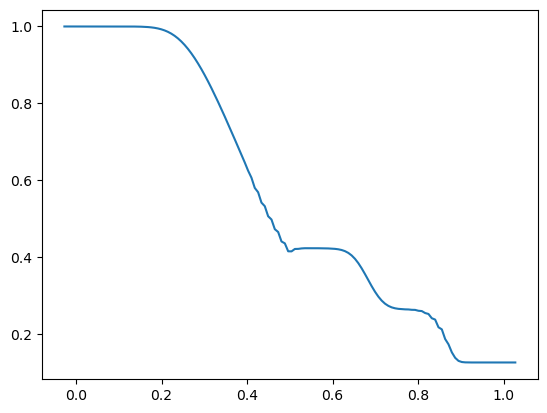

In [8]:
fig, ax = plt.subplots()
ax.plot(e.grid.x, e.U[:, 0])